In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Bakery.csv')

In [3]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [11]:
df.describe()

,TransactionNo
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [13]:
df.duplicated().sum()

1620

In [14]:
df.drop_duplicates(inplace=True)

In [20]:
df.reset_index(drop=True,inplace=True)

In [24]:
item_count = df['Items'].value_counts().reset_index()
print(item_count)

             Items  count
0           Coffee   4528
1            Bread   3097
2              Tea   1350
3             Cake    983
4           Pastry    815
..             ...    ...
89           Bacon      1
90    Gift voucher      1
91  Olum & polenta      1
92        Raw bars      1
93         Polenta      1

[94 rows x 2 columns]


In [27]:
rename_columns = item_count.rename(columns= {'Items': 'item_list', 'count': 'Frequency'})

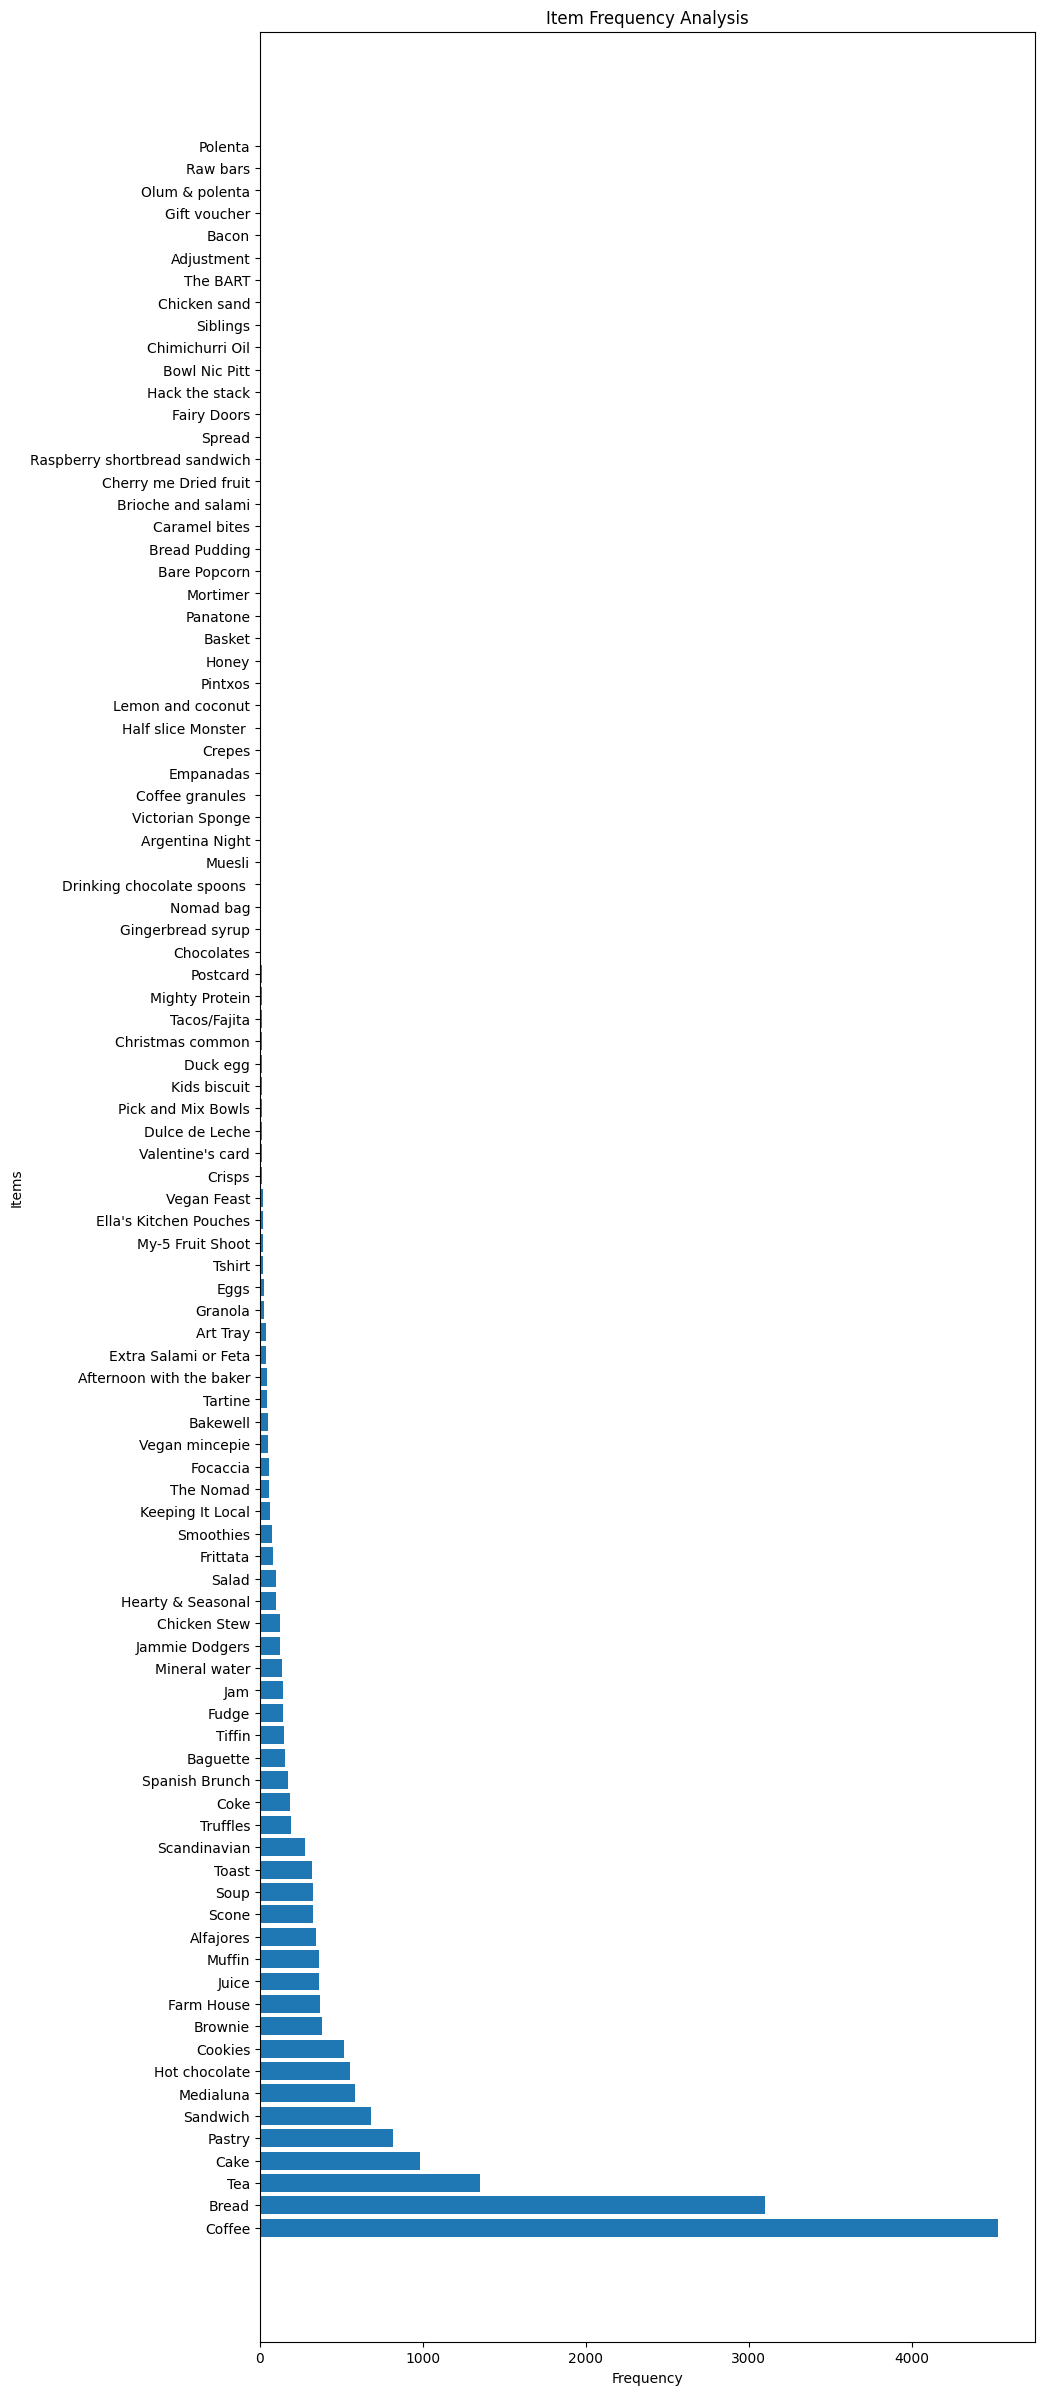

In [31]:
items = rename_columns['item_list']
frequency = rename_columns['Frequency']

fig, ax = plt.subplots(figsize=(10,30))
ax.barh(items, frequency)

ax.set_title('Item Frequency Analysis')
ax.set_xlabel('Frequency')
ax.set_ylabel('Items')

plt.show()

In [32]:
daypart_freq = df['Daypart'].value_counts().reset_index()
daypart_freq

,Daypart,count
0,Afternoon,10687
1,Morning,7697
2,Evening,490
3,Night,13


In [33]:
renamed_daypart = daypart_freq.rename(columns= {'count': 'No_of_transactions'})

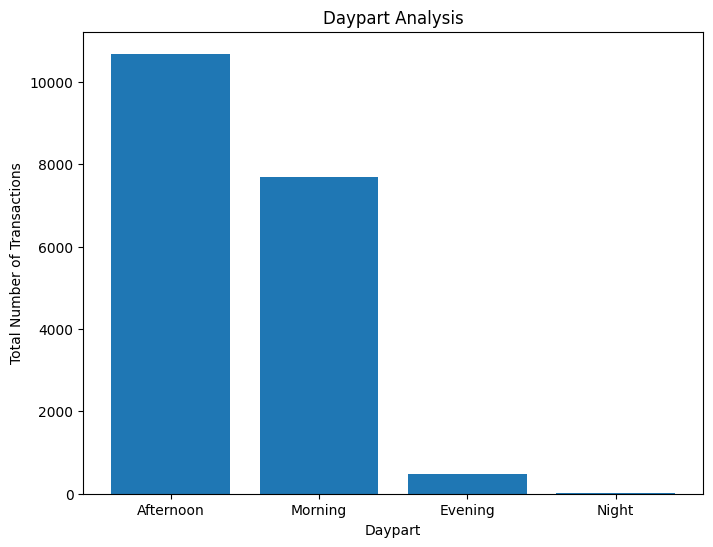

In [37]:
day_part = renamed_daypart['Daypart']
count = renamed_daypart['No_of_transactions']

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(day_part,count)

ax.set_title('Daypart Analysis')
ax.set_xlabel('Daypart')
ax.set_ylabel('Total Number of Transactions')

plt.show()

In [39]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18887 entries, 0 to 18886
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionNo  18887 non-null  int64         
 1   Items          18887 non-null  object        
 2   DateTime       18887 non-null  datetime64[ns]
 3   Daypart        18887 non-null  object        
 4   DayType        18887 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 737.9+ KB


In [42]:
df['Date'] = df['DateTime'].dt.date

df['Time'] = df['DateTime'].dt.time

In [43]:
df

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30,09:58:11
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34
2,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
3,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
4,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
...,...,...,...,...,...,...,...
18882,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04,14:32:58
18883,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04,14:32:58
18884,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04,14:57:06
18885,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04,14:57:06


In [47]:
start_date = '2016-10-30'
end_date = '2017-09-04'

filtered_df = df[(df['DateTime'] >=start_date) & (df['DateTime'] <= end_date)]

transaction_count = filtered_df.shape[0]

print('Total number of transactions: ', transaction_count)

Total number of transactions:  15064


In [46]:
import datetime

start_date = datetime.datetime.strptime('2016-10-30 09:58:11', '%Y-%m-%d %H:%M:%S')
end_date = datetime.datetime.strptime('2017-09-04 15:04:24', '%Y-%m-%d %H:%M:%S')

filtered_df = df[(df['DateTime'] >=start_date) & (df['DateTime'] <= end_date)]
transaction_count = len(filtered_df)

print('Total number of transactions: ', transaction_count)

Total number of transactions:  15131


In [48]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('Date')

df['CummulativeCount'] = df['TransactionNo'].cumsum()

df

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time,CummulativeCount
374,195,Scandinavian,2016-01-11 11:06:09,Morning,Weekday,2016-01-11,11:06:09,195
407,214,Bread,2016-01-11 12:26:43,Afternoon,Weekday,2016-01-11,12:26:43,409
408,214,Tea,2016-01-11 12:26:43,Afternoon,Weekday,2016-01-11,12:26:43,623
409,215,Pastry,2016-01-11 12:30:30,Afternoon,Weekday,2016-01-11,12:30:30,838
410,215,Coffee,2016-01-11 12:30:30,Afternoon,Weekday,2016-01-11,12:30:30,1053
...,...,...,...,...,...,...,...,...
15508,8016,Pastry,2017-12-03 12:32:01,Afternoon,Weekend,2017-12-03,12:32:01,93478404
15509,8017,Baguette,2017-12-03 12:33:04,Afternoon,Weekend,2017-12-03,12:33:04,93486421
15510,8018,Cookies,2017-12-03 12:34:03,Afternoon,Weekend,2017-12-03,12:34:03,93494439
15504,8015,Scone,2017-12-03 12:21:11,Afternoon,Weekend,2017-12-03,12:21:11,93502454


(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01'),
  Text(17257.0, 0, '2017-04'),
  Text(17348.0, 0, '2017-07'),
  Text(17440.0, 0, '2017-10'),
  Text(17532.0, 0, '2018-01')])

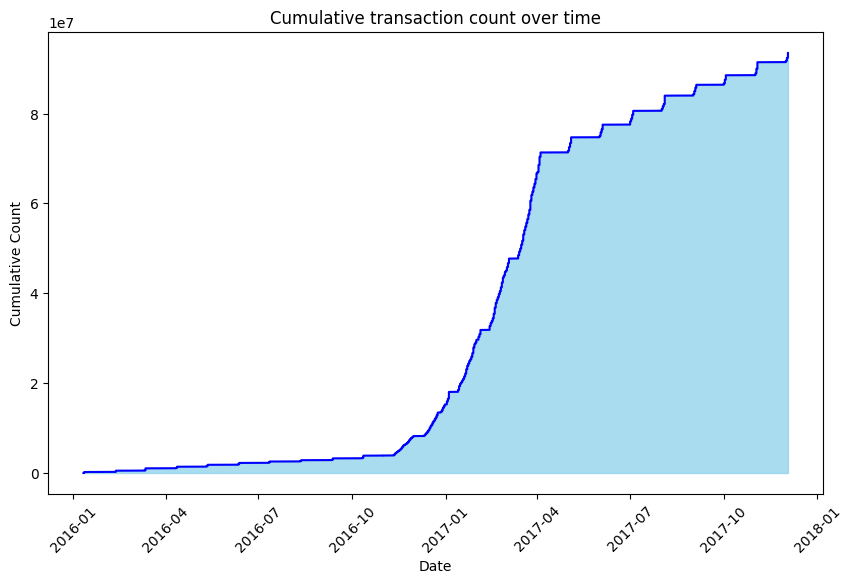

In [50]:
fig, ax = plt.subplots(figsize=(10,6))

ax.fill_between(df['Date'], df['CummulativeCount'], color='skyblue', alpha=0.7)

ax.plot(df['Date'], df['CummulativeCount'], color='blue')

ax.set_title('Cumulative transaction count over time')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Count')
plt.xticks(rotation=45)

In [55]:
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])['TransactionNo'].sum().reset_index()

monthly_sales

,Year,Month,TransactionNo
0,2016,1,221247
1,2016,2,291583
2,2016,3,523297
3,2016,4,357475
4,2016,5,429128
5,2016,6,417158
6,2016,7,315789
7,2016,8,295622
8,2016,9,404075
9,2016,10,634189


Text(0, 0.5, 'Total Sales')

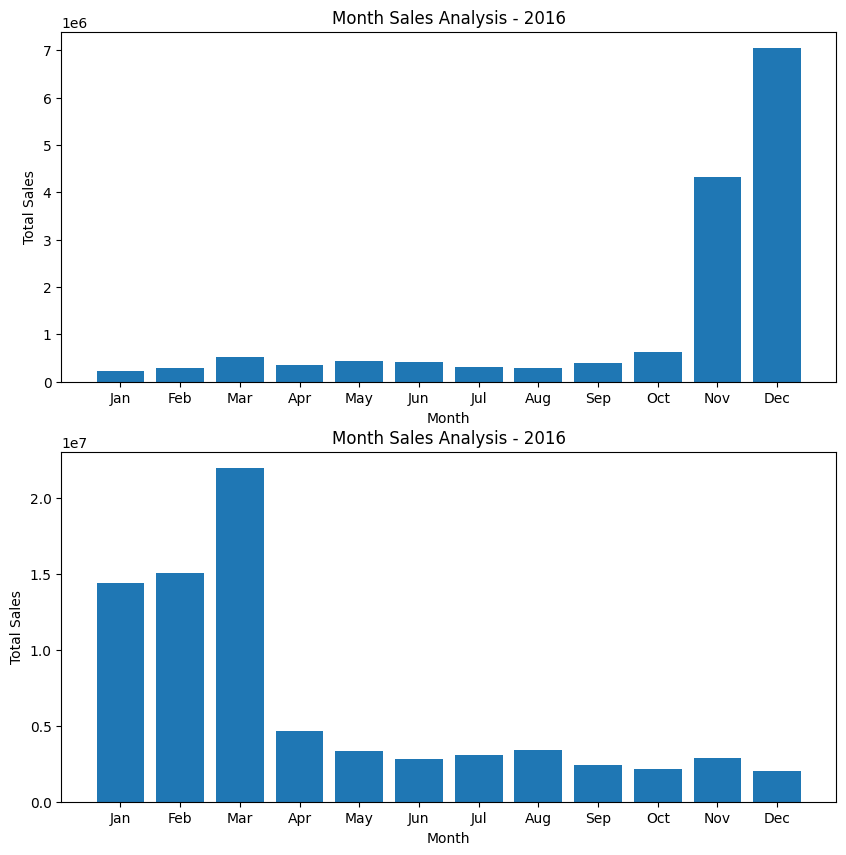

In [60]:
sales_2016 = monthly_sales[monthly_sales['Year'] == 2016]
sales_2017 = monthly_sales[monthly_sales['Year'] == 2017]

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

ax1.bar(sales_2016['Month'], sales_2016['TransactionNo'])
ax1.set_xticks(range(1,13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.set_title('Month Sales Analysis - 2016')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales')

ax2.bar(sales_2017['Month'], sales_2017['TransactionNo'])
ax2.set_xticks(range(1,13))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.set_title('Month Sales Analysis - 2016')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales')

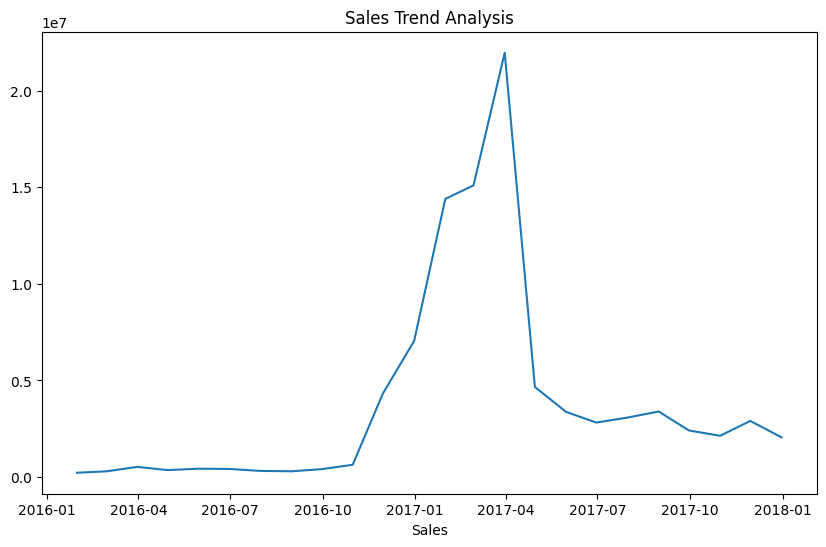

In [61]:
sales_data = df[['DateTime', 'TransactionNo']]

sales_data.set_index('DateTime', inplace=True)

monthly_sales = sales_data.resample('M').sum()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales['TransactionNo'])
plt.title('Sales Trend Analysis')
plt.xlabel('Time')
plt.xlabel('Sales')

plt.show()